# IMEC2001 Herramientas Computacionales 

### Clase 4: Interpolación, diferenciación, integración.

Universidad de los Andes 
---

## TABLA DE CONTENIDO

### Sección 1: Interpolación 
- 1.1. Cargar Librerías
- 1.2. Interpolación Lineal
- 1.3. Interpolación con Splines

### Sección 2: Diferenciación 
- 2.1. Introducción
- 2.2. Diferenciación numérica

### Sección 3. Integración 
- 3.1. Introducción
- 3.2. Integración numérica

<a id="section1"></a>
# Sección 1: Interpolación

La interpolación es el ejercicio de determinar una función $ f(x) $ que pase por un conjunto de puntos.

Típicamente, en los laboratorios de los cursos de Ingeniería Mecánica, se dispone de un número de datos obtenidos por muestreo a partir de un experimento y se pretende construir una función que los ajuste para así obtener nuevos puntos y precisar/expander el análisis.

<div class="alert alert-block alert-success">
    
**Nota:** La interpolación es diferente a la *regresión* dado que la última busca determinar una función que **describa** el modelo físico particular; es decir, una tendencia.
</div>

En general, vamos a utilizar la librería `scipy` para explorar diferentes tipos de interpolación.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.interpolate` dando clic [aquí](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html).
</div>

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# OLS
import numpy as np
import scipy
import sklearn

## 1.2. Interpolación Lineal

En este escenario, tenemos un par de puntos $(x_k,\:y_k)$ y se quiere conocer el valor de $y$ para un valor cualquiera de $x$ en el intervalo $[x_0, x_1, ..., x_n]$.

El ejercicio consiste en determinar la recta que pasa por dos puntos continuos, es decir, en el intervalo $[x_k, \:x_{k+1}]$.

El modelo matemático para un par de puntos $(x_a,\:y_a)$ y $(x_b,\:y_b)$ es:

$$
y = y_a + (x - x_a) \cdot \frac{y_b - y_a}{x_b - x_a}
$$

Con la librería `scipy.interpolate` utilizamos la función `interp1d`. La sintaxis de esta función consiste en:

1. Definir el interpolador mediante `scipy.interpolate.interp1d(x, y)`.
2. Ejecutar la función determinada por el interpolador en el conjunto de puntos independiente mediante.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `interp1d` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).
</div>

In [2]:
# Límite inferior y superior del intervalo
a = 0.0
b = 2 * np.pi
ndatos = 7

# Definición del intervalo
x = np.linspace(start=a, stop=b, num=ndatos)
x

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 6.28318531])

In [3]:
# Función que originalmente desconocemos
y = np.sin(x)
y

array([ 0.00000000e+00,  8.66025404e-01,  8.66025404e-01,  1.22464680e-16,
       -8.66025404e-01, -8.66025404e-01, -2.44929360e-16])

In [4]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.legend(loc=True)
    plt.tight_layout;

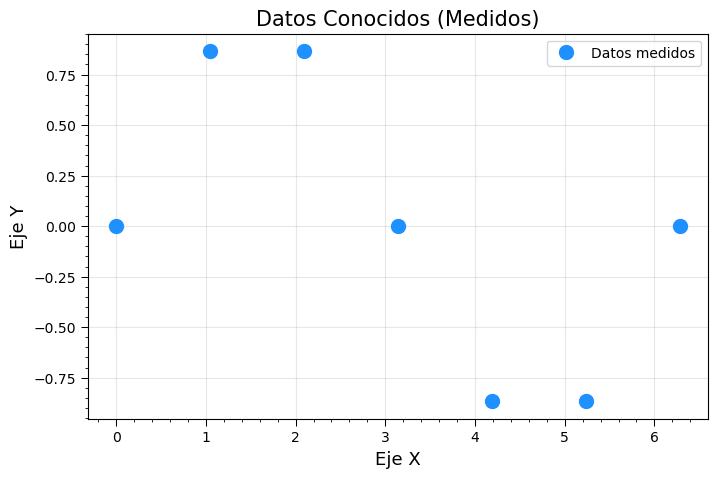

In [5]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos medidos')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

In [6]:
# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(x, y)
itp_lineal

In [7]:
# PASO 2. Evaluamos el interpolador lineal
x_new = 2.5

y_new = itp_lineal(x_new)
y_new

array(0.53059285)

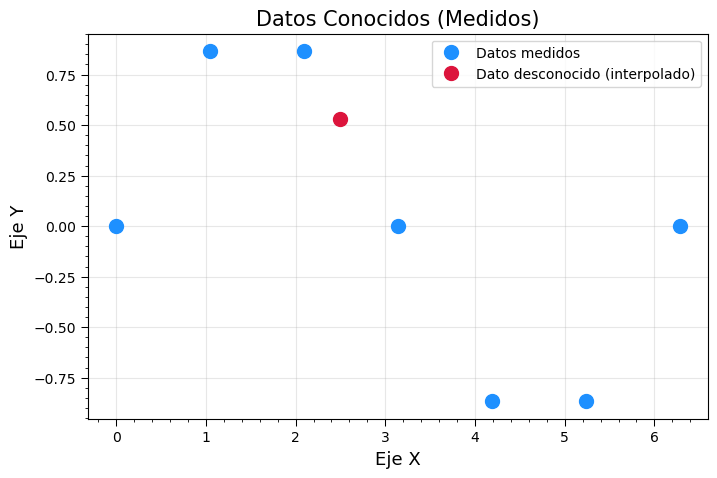

In [8]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos medidos')
plt.plot(x_new, y_new, linestyle='', marker='o', color='crimson', ms=10, label='Dato desconocido (interpolado)')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

Si evaluamos el interpolador lineal con los datos conocidos, vemos lo siguiente:

In [9]:
y_inter = itp_lineal(x)
y_inter

array([ 0.00000000e+00,  8.66025404e-01,  8.66025404e-01,  1.22464680e-16,
       -8.66025404e-01, -8.66025404e-01, -2.44929360e-16])

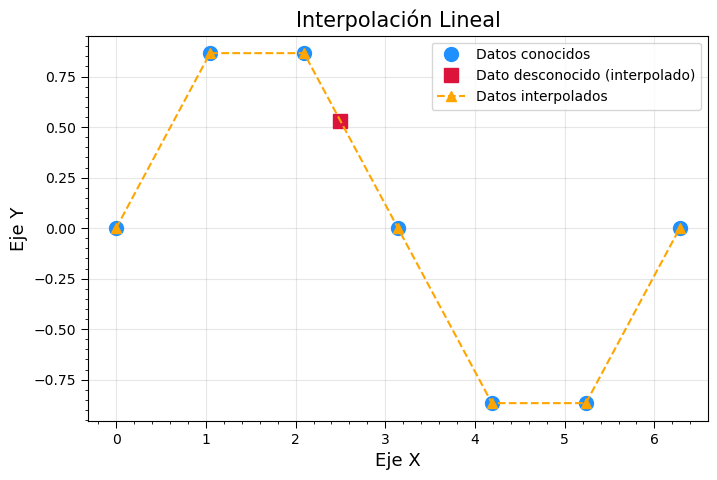

In [10]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='', marker='s', color='crimson', ms=10, label='Dato desconocido (interpolado)')
plt.plot(x, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Interpolación Lineal', 
                ejex='Eje X', 
                ejey='Eje Y')

Note lo que sucede si se aumenta el número de puntos del conjunto de datos conocidos.

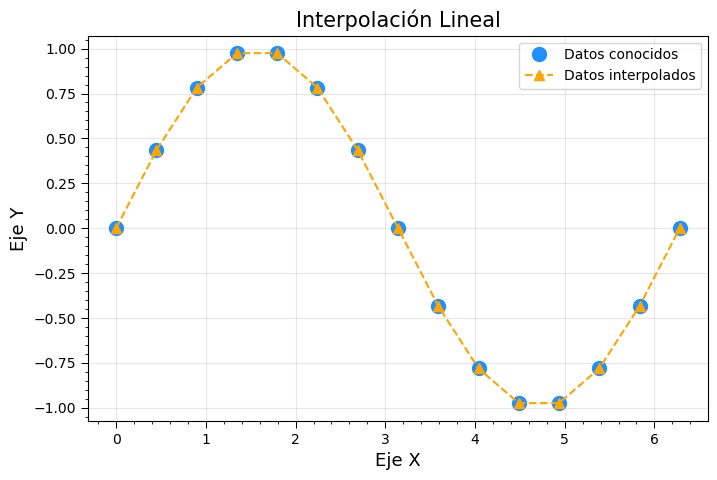

In [11]:
ndatos = 15
x = np.linspace(start=a, stop=b, num=ndatos)
y = np.sin(x)

# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(x, y)

# PASO 2. Evaluamos el interpolador lineal
y_inter = itp_lineal(x)

# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Interpolación Lineal', 
                ejex='Eje X', 
                ejey='Eje Y')

Ahora, si en lugar de partir de una función utilizamos una nube de puntos (como típicamente es en un laboratorio), ¿cómo lo haríamos y qué obtendríamos?

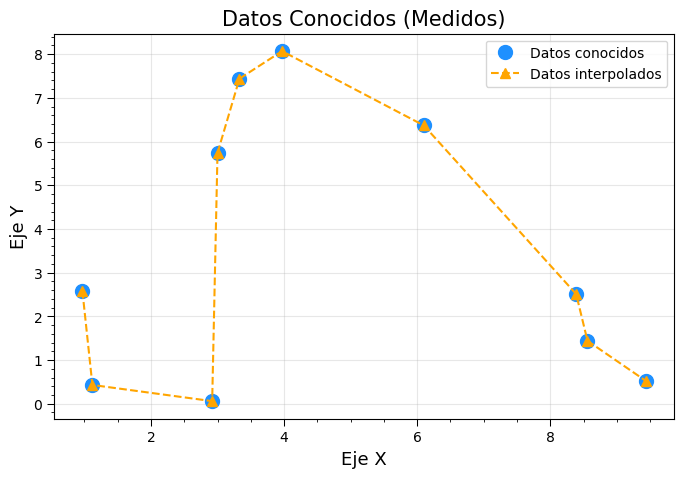

In [12]:
xx = [0.97, 1.12, 2.92, 3.00, 3.33, 3.97, 6.10, 8.39, 8.56, 9.44]
yy = [2.58, 0.43, 0.06, 5.74, 7.44, 8.07, 6.37, 2.51, 1.44, 0.52]

# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(xx, yy)

# PASO 2. Evaluamos el interpolador lineal
y_inter = itp_lineal(xx)

# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(xx, yy, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(xx, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

In [13]:
x_new = 5.3
y_new = itp_lineal(x_new)

print(f'Para xx = {x_new}, el valor de yy es {np.round(y_new, 2)}.')

Para xx = 5.3, el valor de yy es 7.01.


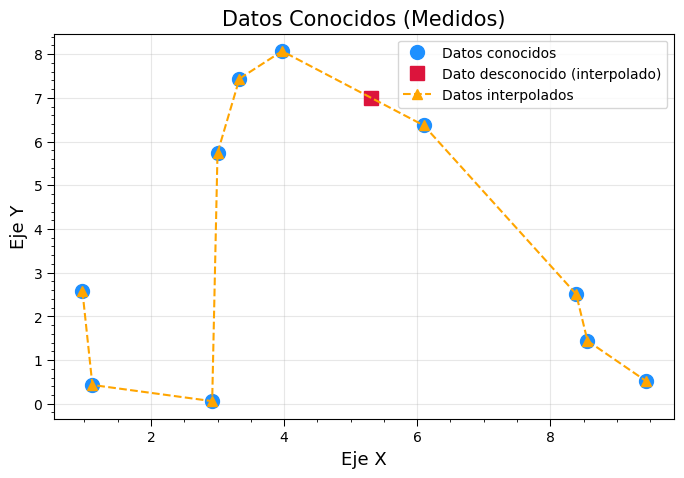

In [14]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(xx, yy, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='', marker='s', color='crimson', ms=10, label='Dato desconocido (interpolado)')
plt.plot(xx, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

## 1.3. Interpolación con Splines

Un *spline* es una curva suave definida en partes mediante diferentes polinomios.

En interpolación, los *splines* dan lugar a buenos resultados para formas complicadas requiriendo solamente el uso de polinomios de bajo grado, evitando así las oscilaciones indeseables que se dan al interpolar mediante polinomios de grado elevado.

Con la librería `scipy.interpolate` utilizamos la función `splrep` para crear el interpolador con *spline* cúbico, y luego la función `splev` para evaluar el interpolador con datos desconocidos.

Si se tienen solo dos puntos, el polinomio que pasa por estos es de grado uno, es decir, una recta. Si se tienen tres puntos, el polinomio es de segundo grado, es decir, unaparábola. Por tanto, en el caso general de tener $n$ puntos, el polinomio sería de grado $n-1$, es decir:

$$
y = a_0 x^{n-1} + a_1 x^{n-2} + ... + a_{n-2} x + a_{n-1}
$$

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `splprep` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep) y `splev` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev).
</div>

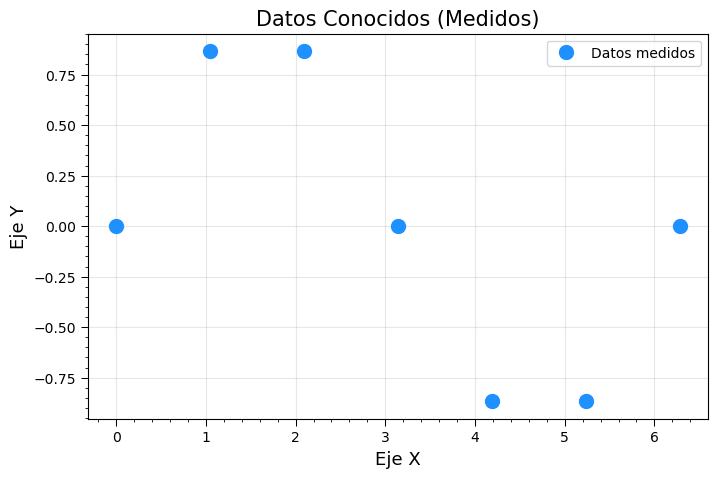

In [15]:
# Límite inferior y superior del intervalo
a = 0.0
b = 2 * np.pi
ndatos = 7

# Definición del intervalo
x = np.linspace(start=a, stop=b, num=ndatos)

# Función que originalmente desconocemos
y = np.sin(x)

# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos medidos')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

In [16]:
# PASO 1. Creamos el interpolador spline cúbico
itp_spline = scipy.interpolate.splrep(x, y, k=3) # k es el grado del spline (para cúbico, k=3)

# PASO 2. Evaluamos el interpolador spline cúbico
x_new = np.linspace(start=a, stop=b, num=15)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)
y_new

array([-1.08918381e-18,  4.63310967e-01,  7.90279742e-01,  9.63863551e-01,
        9.67019620e-01,  7.83336389e-01,  4.34275130e-01,  8.32667268e-17,
       -4.34275130e-01, -7.83336389e-01, -9.67019620e-01, -9.63863551e-01,
       -7.90279742e-01, -4.63310967e-01, -2.44929360e-16])

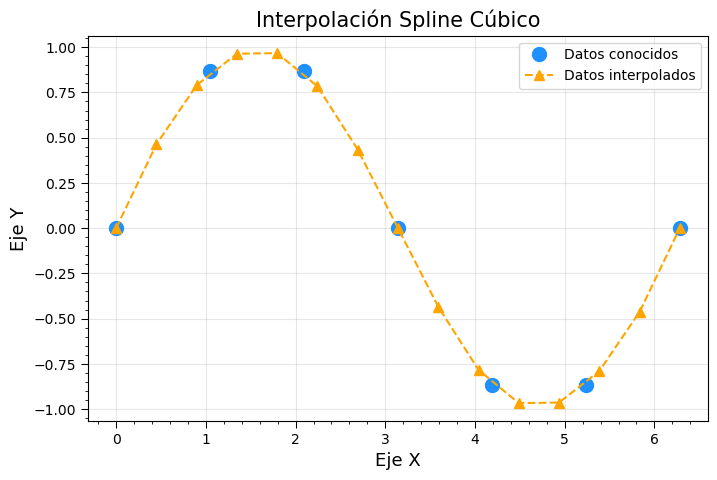

In [17]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Interpolación Spline Cúbico', 
                ejex='Eje X', 
                ejey='Eje Y')

<a id="section2"></a>
# Sección 2: Derivación numérica

## 2.1. Introducción

## Derivadas Numéricas en Python

En análisis numérico, las derivadas numéricas son una aproximación de la derivada de una función en un punto utilizando diferencias finitas. Hay tres métodos comunes para calcular derivadas numéricas: hacia adelante, hacia atrás y centradas.

### Derivada hacia adelante

La derivada hacia adelante se calcula usando la siguiente fórmula:

$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

### Derivada hacia atrás

La derivada hacia atrás se calcula usando la siguiente fórmula:

$$
f'(x) \approx \frac{f(x) - f(x - h)}{h}
$$

### Derivada centrada

La derivada centrada se calcula usando la siguiente fórmula:

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

Estos métodos son útiles para calcular las derivadas de datos experimentales, siempre que se pueda, se aplica la derivada centrada, pues es la más útil ya que recoge información de los datos experimentales anteriores y posteriores al punto de interés.

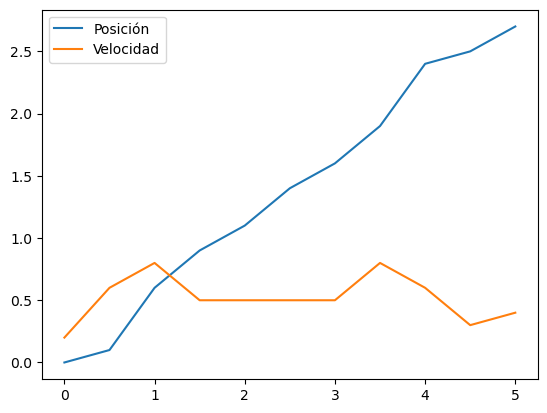

In [18]:
#Implementación en python.
#Calcularemos la velocidad de un experimento cinético.
t=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] #Tiempos del experimento
x=[0,0.1,0.6,0.9,1.1,1.4,1.6,1.9,2.4,2.5,2.7] #Posición en el tiempo 
dx_dt=np.gradient(x,t) #Se deriva numéricamente la posición

plt.plot(t,x,label="Posición")
plt.plot(t,dx_dt,label="Velocidad")
plt.legend()

<a id="section3"></a>
# Sección 3: Integración 

# Integración Numérica

La integración numérica es un método para aproximar el valor de una integral definida mediante el uso de técnicas numéricas. En lugar de encontrar la solución analítica, se emplean algoritmos para calcular una aproximación numérica. Aquí se presentan dos métodos comunes: el método del punto medio y la regla del trapecio.

## Método del Punto Medio

La fórmula para el método del punto medio se define como:

$$
\int_{a}^{b} f(x) \,dx \approx (b-a) \cdot f\left(\frac{a+b}{2}\right)
$$

## Regla del Trapecio

La regla del trapecio aproxima la integral mediante áreas trapezoidales. La fórmula es:

$$
\int_{a}^{b} f(x) \,dx \approx \frac{b-a}{2} \cdot \left[ f(a) + f(b) \right]
$$

donde los términos son definidos de manera similar al método del punto medio.

La integración numérica del trapecio se ve de la siguiente forma:

# <center> 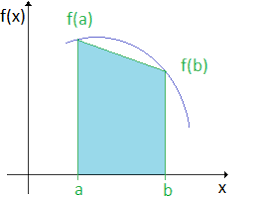


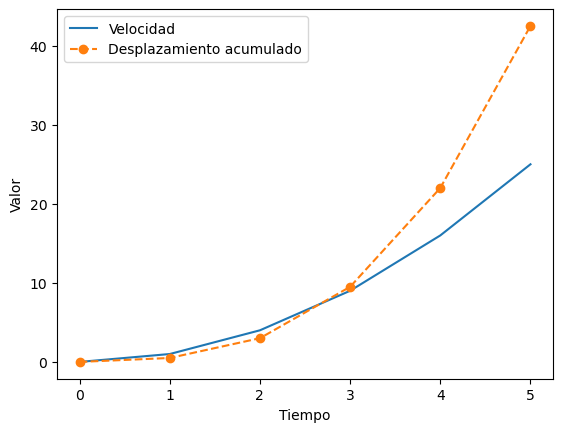

In [19]:
#Uso en python 
#Ahora haremos el ejercicio inverso, a partir de la velocidad integrar y obtener el desplazamiento
from scipy.integrate import cumtrapz

t = np.array([0, 1, 2, 3, 4, 5]) #Datos de tiempo
dxdt = np.array([0, 1, 4, 9, 16, 25]) #Velocidad en diferentes instantes

# Realizar la integración numérica utilizando la regla del trapecio
# Calcular el desplazamiento acumulado utilizando la regla del trapecio acumulativa
x= cumtrapz(dxdt, t, initial=0)

# Visualizar los resultados
plt.plot(t, dxdt, label='Velocidad')
plt.plot(t, x, label='Desplazamiento acumulado', linestyle='--', marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()